In [1]:
run tp3_v3.py

[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Time series of the Indexes and the ETFs

#### Time Series plot grid of the monthly historical returns of the ETF's benchmark Index 

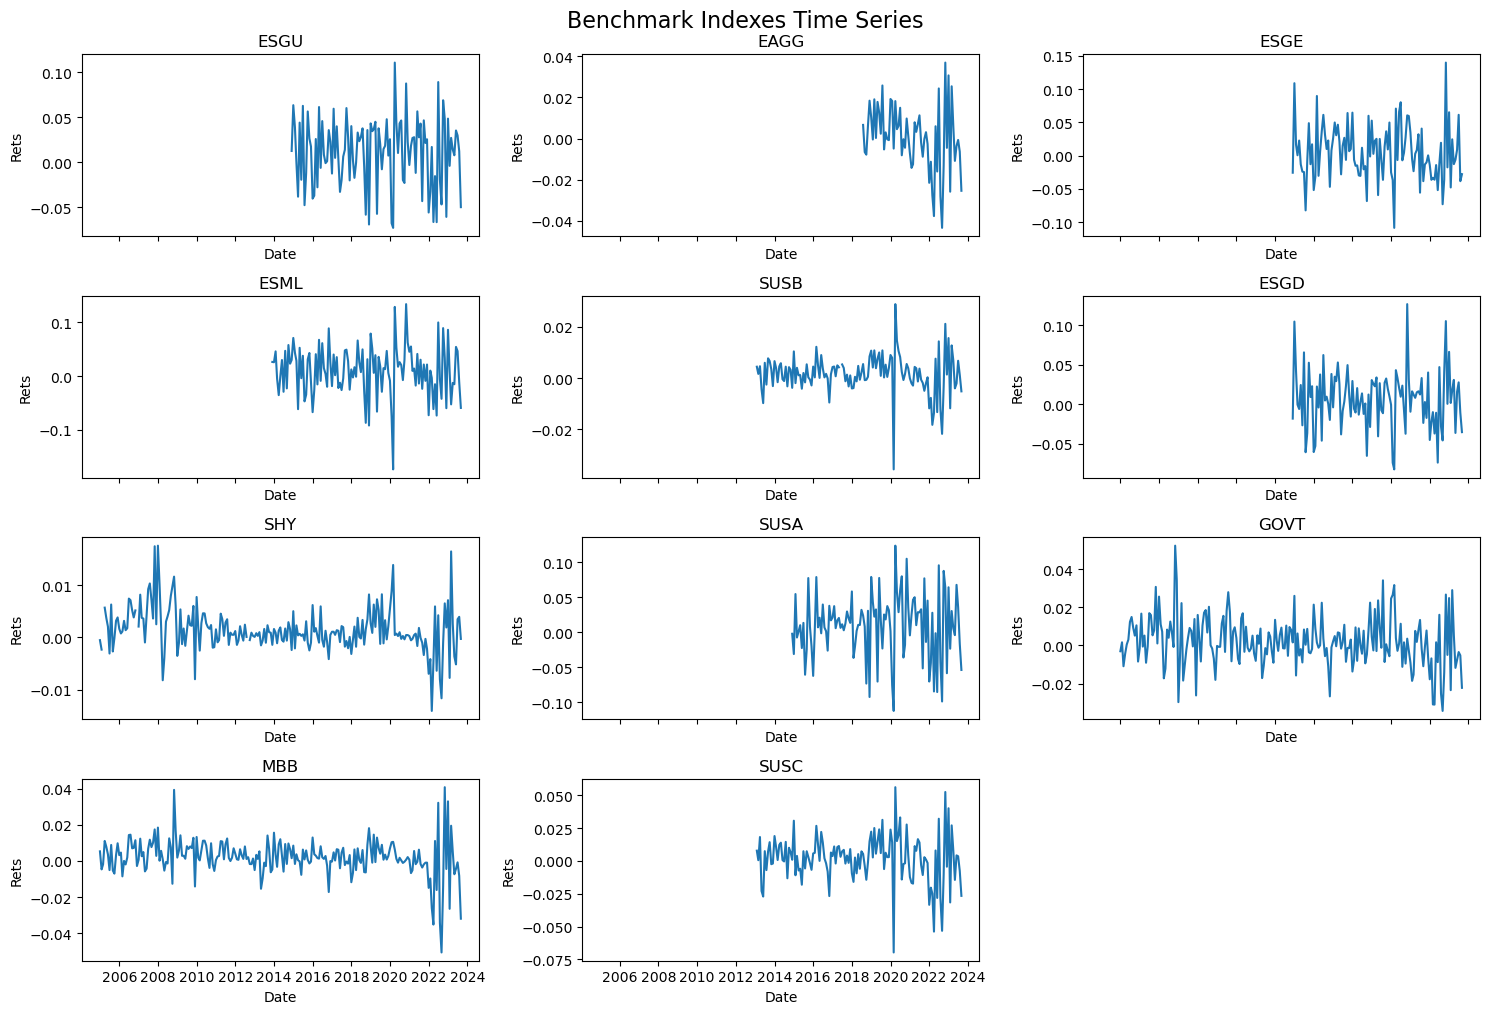

In [2]:
plot_time_series_grid(df_index_rets, title='Benchmark Indexes Time Series',  y_axis_label="Rets" )

#### Time Series plot grid of the ETF's historical monthly returns

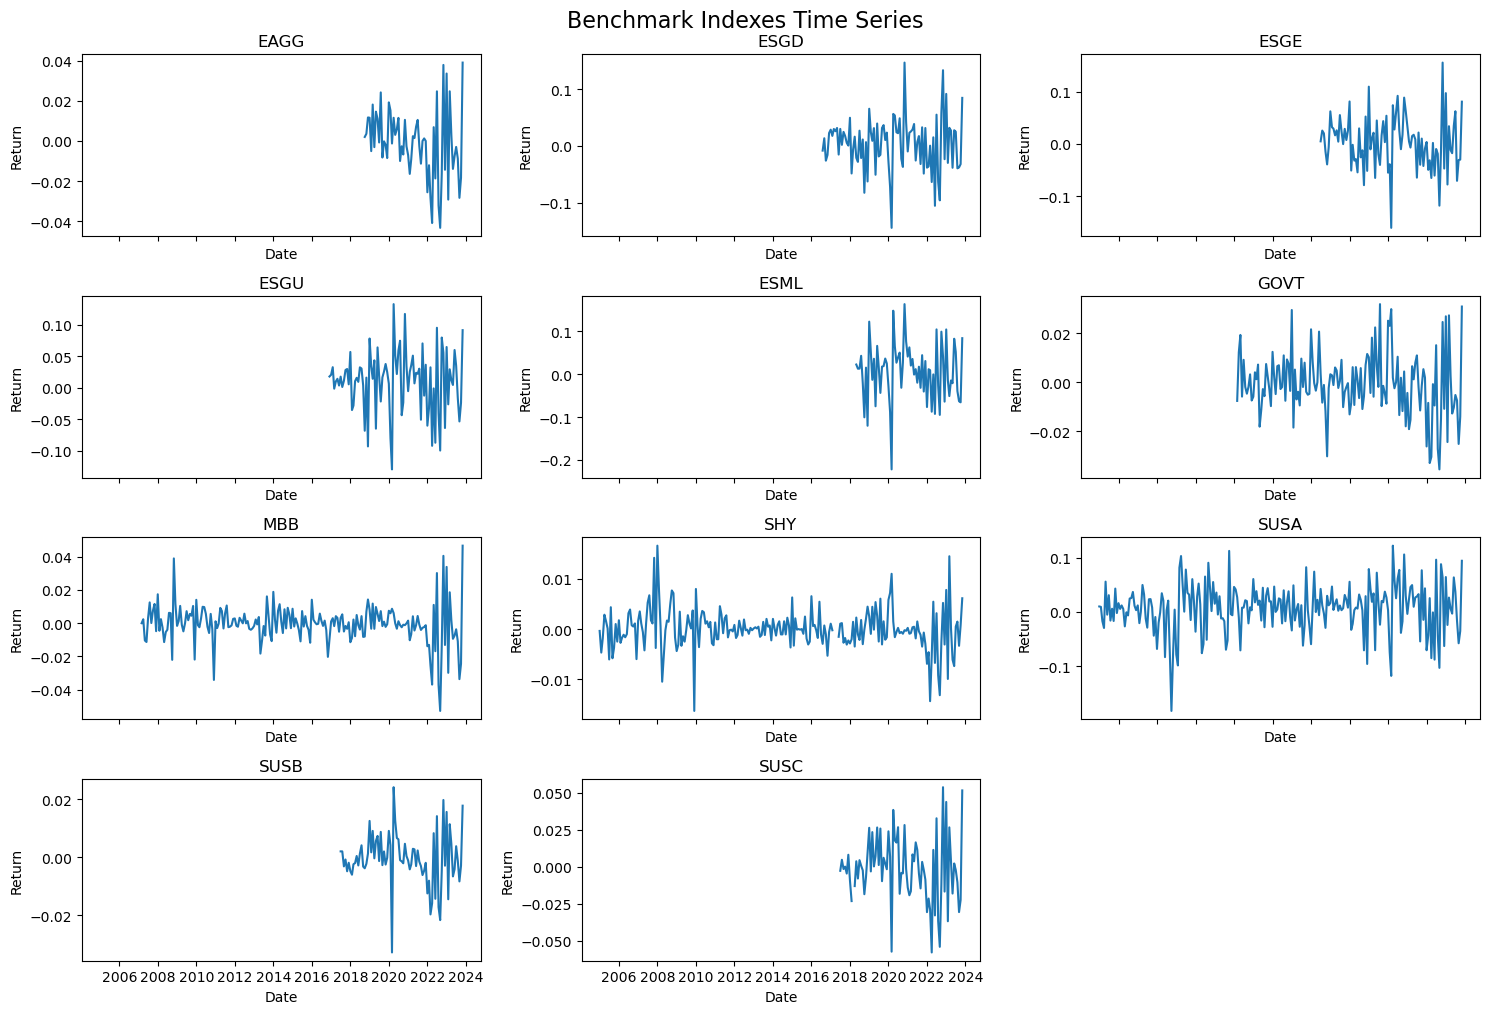

In [3]:
plot_time_series_grid(etf_monthly_rets)

### Tracking error between ETF's and associated benchmark Index 

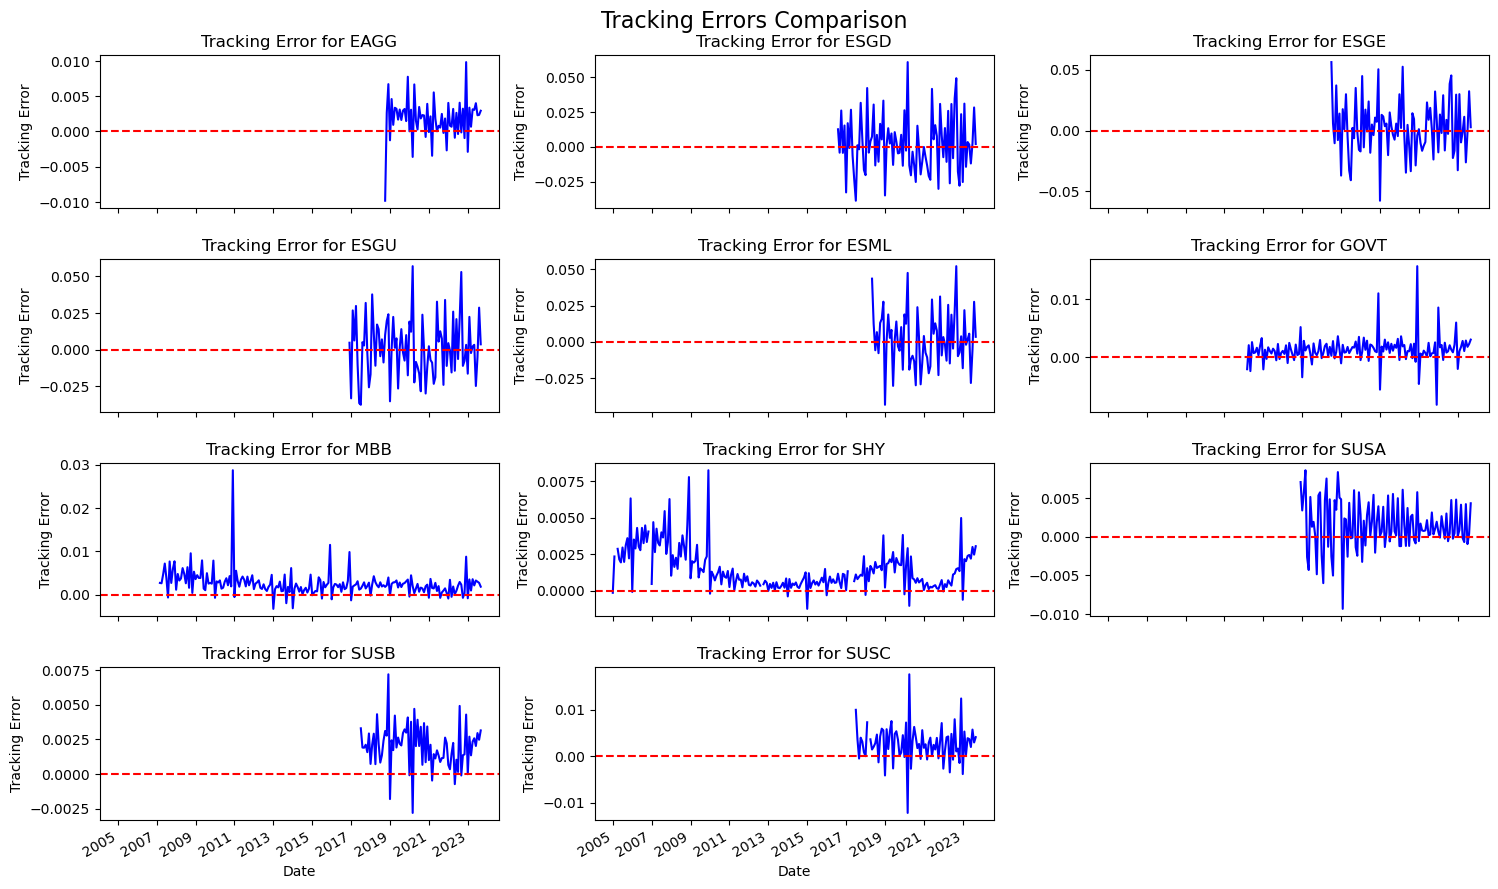

In [4]:
TE_fct(df_index_rets, etf_monthly_rets)

### Imputing data to index dataframe

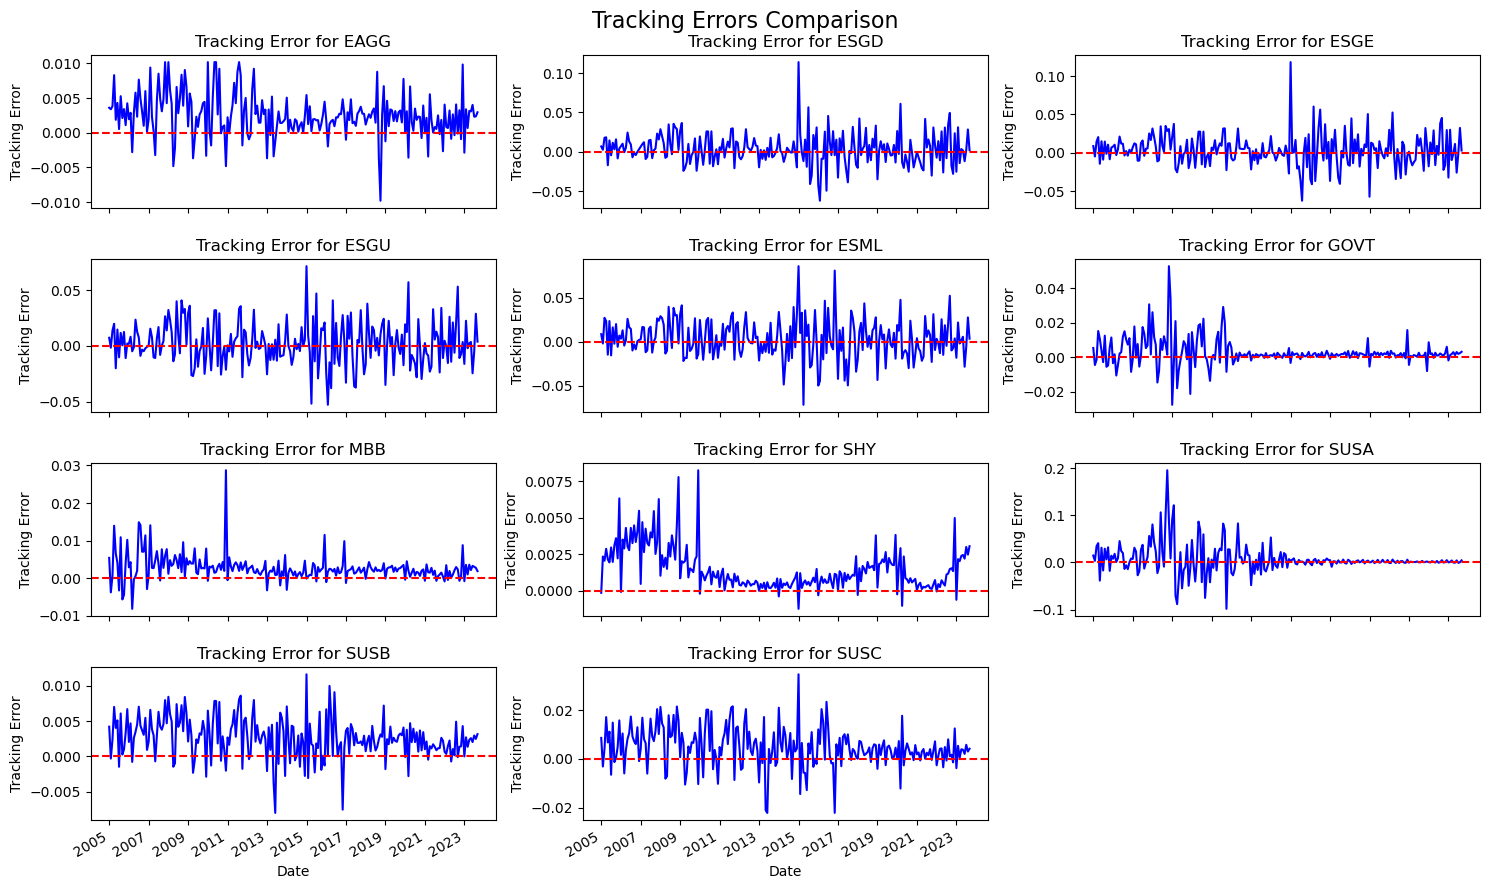

In [5]:
TE_fct(df_imputed_index, df_imputed_etf)

## Input Data Analysis 

#### correlation analysis of the historical monthly returns of the ETF's benchmark index 

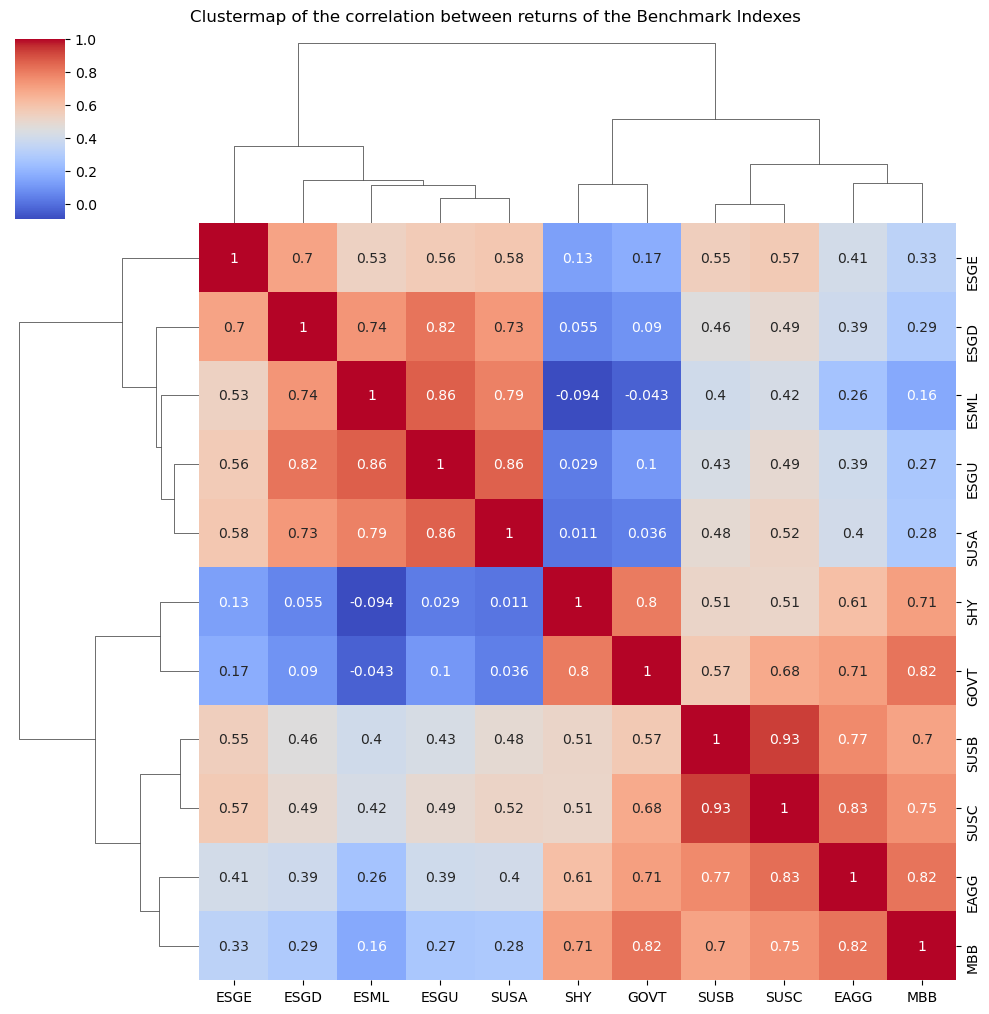

In [6]:
# Clustermap of correlation of benchmark indexes returns
imputed_index_corr = pd.DataFrame(df_imputed_index).corr()
sns.clustermap(imputed_index_corr, annot=True, square=True, cmap='coolwarm')
plt.suptitle('Clustermap of the correlation between returns of the Benchmark Indexes').set_y(1.01)

plt.show();

#### histograms of the Indexes monthly returns 


ESGU
count    225.000000
mean       0.013497
std        0.026789
min       -0.072736
25%        0.010494
50%        0.014709
75%        0.022794
max        0.110611
Name: ESGU, dtype: float64
Average spread of the benchmark index: 0.18334701034632206
Maximum spread of the benchmark index: 0.18334701034632206
Skewness of the benchmark index: -0.6834271821539405 
Kurtosis of the benchmark index: 2.578203934454524 

EAGG
count    225.000000
mean       0.001164
std        0.008596
min       -0.043401
25%       -0.000469
50%        0.001289
75%        0.003997
max        0.036925
Name: EAGG, dtype: float64
Average spread of the benchmark index: 0.08032620818975811
Maximum spread of the benchmark index: 0.08032620818975811
Skewness of the benchmark index: -0.8125949842758964 
Kurtosis of the benchmark index: 7.895782987704278 

ESGE
count    225.000000
mean       0.007544
std        0.028814
min       -0.108789
25%       -0.000388
50%        0.009997
75%        0.015606
max        0.140001
N

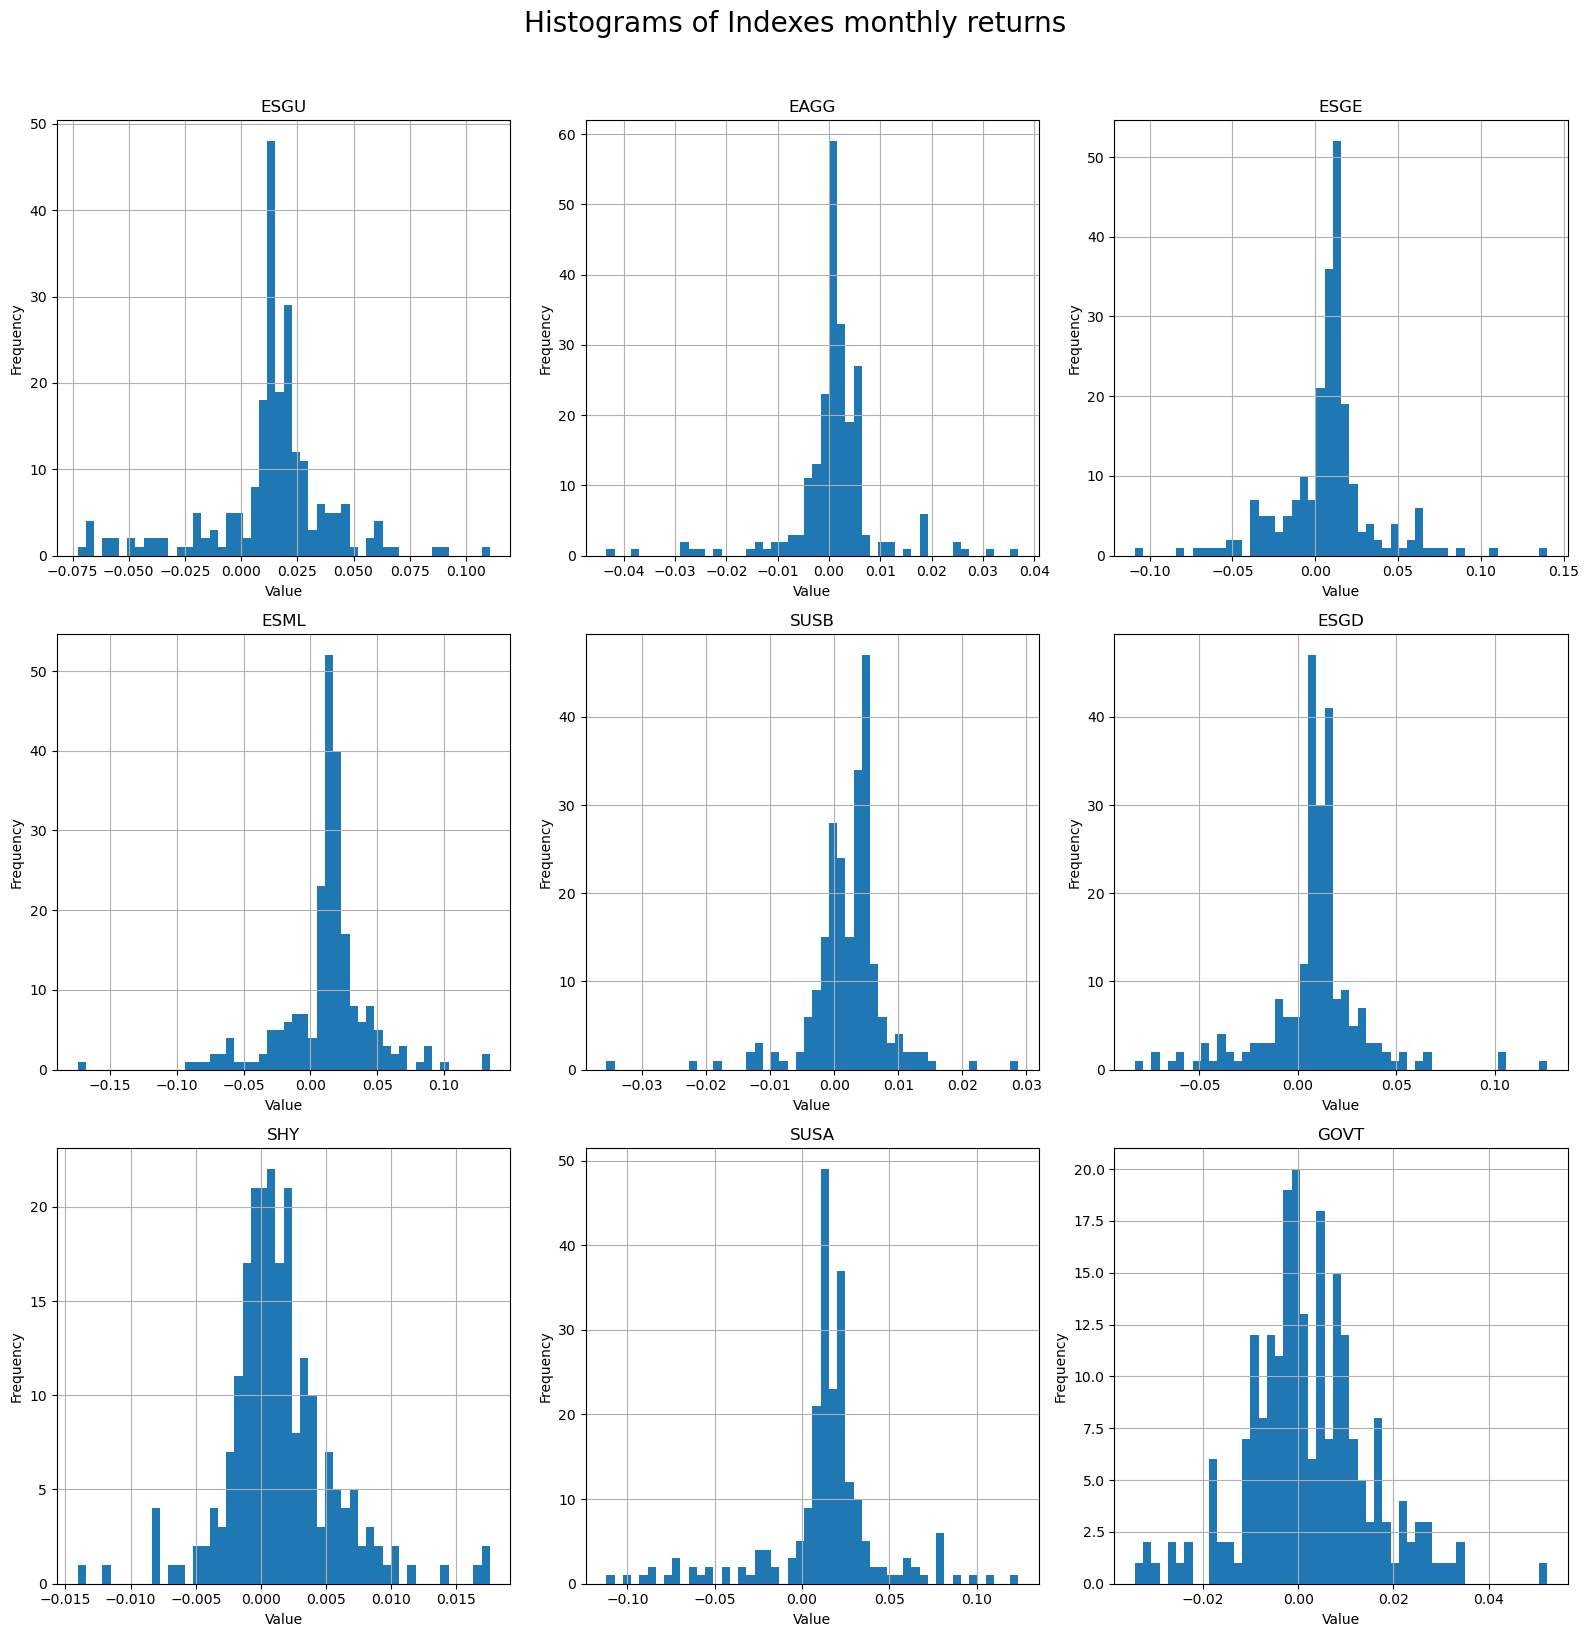

In [7]:

# Get the list of all column names
columns = df_imputed_index.columns

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Histograms of Indexes monthly returns", fontsize=20).set_y(1.02)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through the columns and plot histograms
for i, column in enumerate(columns):
    if i >= num_rows * num_cols:
        break  # Exit the loop if you exceed the number of subplots
    
    ax = axs[i]
    df_imputed_index[column].hist(ax=ax, bins=50)  # You can adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    print(f'\033[1m{column}\033[0m')
    print(df_imputed_index[column].describe())
    print(f'Average spread of the benchmark index: {np.mean(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Maximum spread of the benchmark index: {np.max(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Skewness of the benchmark index: {np.mean(skew(df_imputed_index[column][:], nan_policy="omit"))} ')
    print(f'Kurtosis of the benchmark index: {np.mean(kurtosis(df_imputed_index[column][:], nan_policy="omit"))} ')
    print('', sep='\n')

    # Hide any empty subplots if there are more subplots than columns
    for i in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()



## Machine learning methods to predict next month return
* Random Forest 
* Regression Tree

#### Features historical values analysis 

**Bonds**
 
- **BAMLCC0A0CMTRIV**: ICE BofA US Corporate Index Total Return Index Value <br>
- **BAMLC0A4CBBB**: ICE BofA BBB US Corporate Index Option-Adjusted Spread  <br>
- **BAMLC0A3CA**: ICE BofA Single-A US Corporate Index Option-Adjusted Spread  <br>
- **HQMCB10YR**: 10-Year High Quality Market (HQM) Corporate Bond Spot Rate <br>
- **FEDFUNDS**: Federal Funds Effective Rate <br>
- **T10Y2Y**: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity <br>
- **TB3SMFFM**: 3-Month Treasury Bill Minus Federal Funds Rate <br>
- **T5YFF**: 5-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **T1YFF**: 1-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **DLTIIT**: Treasury Long-Term Average (Over 10 Years), Inflation-Indexed <br>


**Equity Indexes**
- **NASDAQCOM**: NASDAQ Composite Index<br>
- **WILL5000PR**: Wilshire 5000 Price Index<br>
- **WILLLRGCAP**: Wilshire US Large-Cap Total Market<br>
- **WILLSMLCAP**: Wilshire US Small-Cap Total Market Index<br>
- **WILLLRGCAPGR**: Wilshire US Large-Cap Growth Total Market Index<br>
- **WILLLRGCAPVAL**: Wilshire US Large-Cap Value Total Market Index<br>
- **WILLMIDCAP**: Wilshire US Mid-Cap Total Market Index<br>
- **SBPREUE**: S&P Europe LargeMidCap <br>
- **MXEUMC**: MSCI Europe Mid Cap Index (USD)<br>
- **MXEULC**: MSCI Europe Large Cap Index (USD)<br>
- **SPAXLCUP**: S&P Pan Asia Ex-JP, AU, NZ, IN LargeCap Index<br>
- **SBPRAPU**: S&P Asia Pacific LargeMidCap<br>
- **MEMMG**: Morningstar Emerging Markets<br>
- **MXEF**: MSCI Emerging Markets Index<br>
- **MXEFLC**: MSCI Emerging Markets Large Cap Index (USD)<br>
- **MXEFMC**: MSCI Emerging Markets Mid Cap Index (USD)<br>
- **SML**: S&P SmallCap 600<br>


**Other**
- **MSPUS**: Median Sales Price of Houses Sold for the United States <br>
- **CCSA**: Continued Claims (Insured Unemployment) <br>
- **BOPGSTB**: Trade Balance: Goods and Services, Balance of Payments Basis<br>
- **VIXCLS**: CBOE Volatility Index: VIX<br>
- **USSLIND**: Leading Index for the United States<br>
- **USALOLITONOSTSAM**: Leading Indicators OECD: Leading Indicators: Composite Leading Indicator: Normalised for United States<br>
- **UNRATE**: Unemployment Rate<br>
- **STICKCPIM157SFRBATL**: Sticky Price Consumer Price Index less Food and Energy       <br>
- **EMVMACROBUS**: Equity Market Volatility Tracker: Macroeconomic News and Outlook: Business Investment And Sentiment<br>
- **MORTGAGE30US**: 30-Year Fixed Rate Mortgage Average in the United States<br>
- **WILLRESIPR**: Wilshire US Real Estate Securities Price Index (Wilshire US RESI)<br>



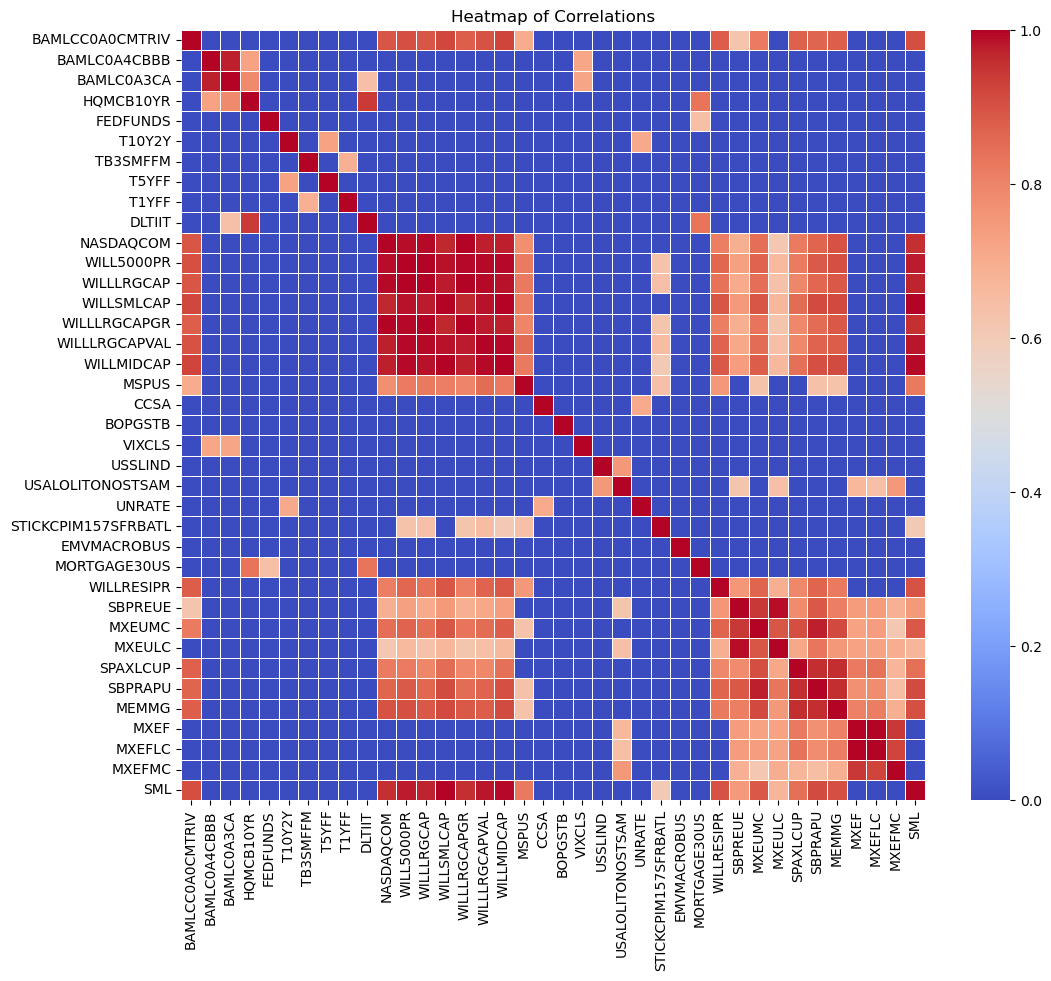

In [8]:
# Set a threshold for correlation
x_corr = pd.DataFrame(x).corr()
threshold = 0.6
x_corr[x_corr < threshold] = 0

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(x_corr, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlations')
plt.show()

We can notice some strong correlations levels are observable among the historical features values. This makes sense since we do expect indeed that interest rate measure move together. This is also true for total market equity indexes used such as S&P500, Wilshire 1000, Wildshire total market, etc.  The following table describe the feature associated with the tick presented in the clustermap. 

## Random Forest

Average Mean Absolute Error using 5-fold cross-validation - Random Forest

Average Mean Absolute Error for ESGU: 0.021628396795176547
Average Mean Absolute Error for EAGG: 0.005460824371608692
Average Mean Absolute Error for ESGE: 0.020315136355501327
Average Mean Absolute Error for ESML: 0.02594794187408438
Average Mean Absolute Error for SUSB: 0.004206144803118057
Average Mean Absolute Error for ESGD: 0.018962273025264022
Average Mean Absolute Error for SHY: 0.002562424930572775
Average Mean Absolute Error for SUSA: 0.02353511985171896
Average Mean Absolute Error for GOVT: 0.010050696362135726
Average Mean Absolute Error for MBB: 0.00643049346933376
Average Mean Absolute Error for SUSC: 0.010443143711638977


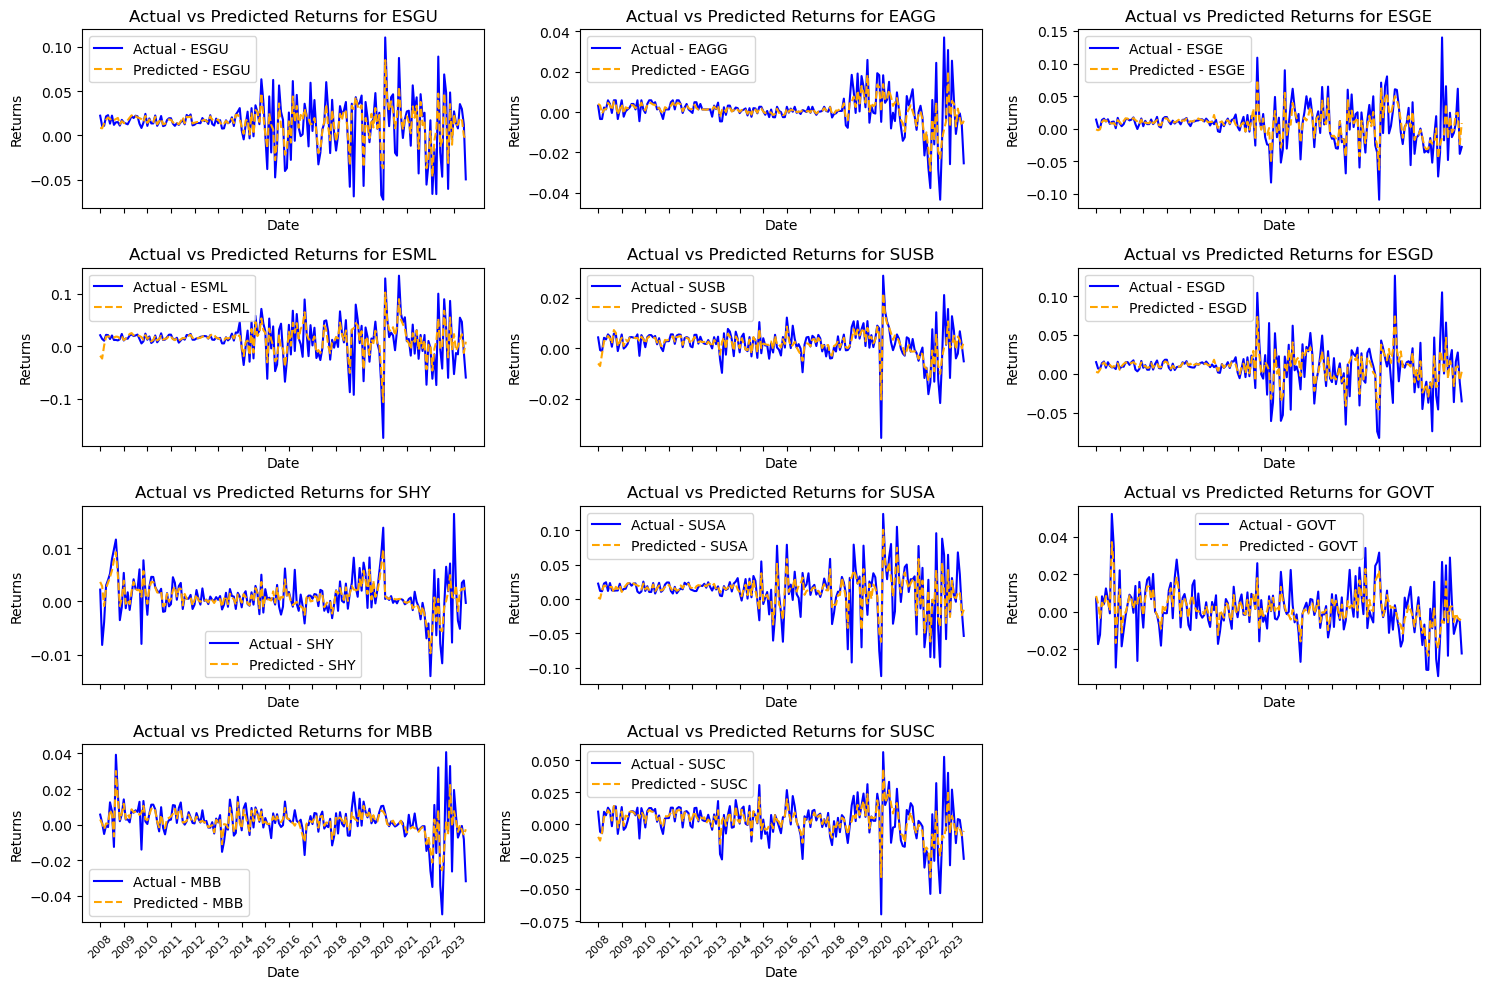

In [9]:
# Number of folds for cross-validation
num_folds = 5

# Create a grid for subplots
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
years = time_serie_plot.str[:4]

print(f'Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRandom Forest\033[0m')
print('', sep='/n')

# Iterate over each index
for i, ticker in enumerate(ticker_list):
    # Extract features and target variable for the current stock
    x = merged_df[features_list]
    y = merged_df[ticker]
    
    # Standardize features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # K-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Initialize model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Lists to store evaluation metrics
    mae_list = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list = []
    predicted_returns_list = []
    
    # Iterate over folds
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Model Training
        rf_model.fit(X_train, y_train)
        
        # Model Prediction
        y_pred = rf_model.predict(X_test)
        
        # Evaluate Model Performance
        mae = mean_absolute_error(y_test, y_pred)
        mae_list.append(mae)
        
        # Store actual and predicted returns for plotting
        actual_returns_list.extend(y_test)
        predicted_returns_list.extend(y_pred)
    
    # Calculate average MAE across folds for the current stock
    average_mae = sum(mae_list) / len(mae_list)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae}')
    
    # Predict returns for the entire period
    predicted_returns = rf_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame
    predicted_returns_df[ticker] = predicted_returns

    # Plot the actual and predicted time series only if there is data
    if not y.empty:
        ax = axes[i]
        ax.plot(time_serie_plot, y, label=f'Actual - {ticker}', color='blue')
        ax.plot(time_serie_plot, predicted_returns, label=f'Predicted - {ticker}', linestyle='--', color='orange')
        ax.set_title(f'Actual vs Predicted Returns for {ticker}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns')
        ax.legend()

        # Adjust x-axis labels
        ax.set_xticks(time_serie_plot[::12])  # Set x-axis ticks every 12 months
        ax.set_xticklabels(years[::12], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Regression Tree

Average Mean Absolute Error using {num_folds}-fold cross-validation - Regression Tree

Average Mean Absolute Error for ESGU: 0.027121576979616157
Average Mean Absolute Error for EAGG: 0.006709033971803694
Average Mean Absolute Error for ESGE: 0.027829779583611453
Average Mean Absolute Error for ESML: 0.035833622501791326
Average Mean Absolute Error for SUSB: 0.005687058267865431
Average Mean Absolute Error for ESGD: 0.027656919298076517
Average Mean Absolute Error for SHY: 0.0034232269613772488
Average Mean Absolute Error for SUSA: 0.028610690015443464
Average Mean Absolute Error for GOVT: 0.013864727604217596
Average Mean Absolute Error for MBB: 0.008206909659849305
Average Mean Absolute Error for SUSC: 0.014381035809613705


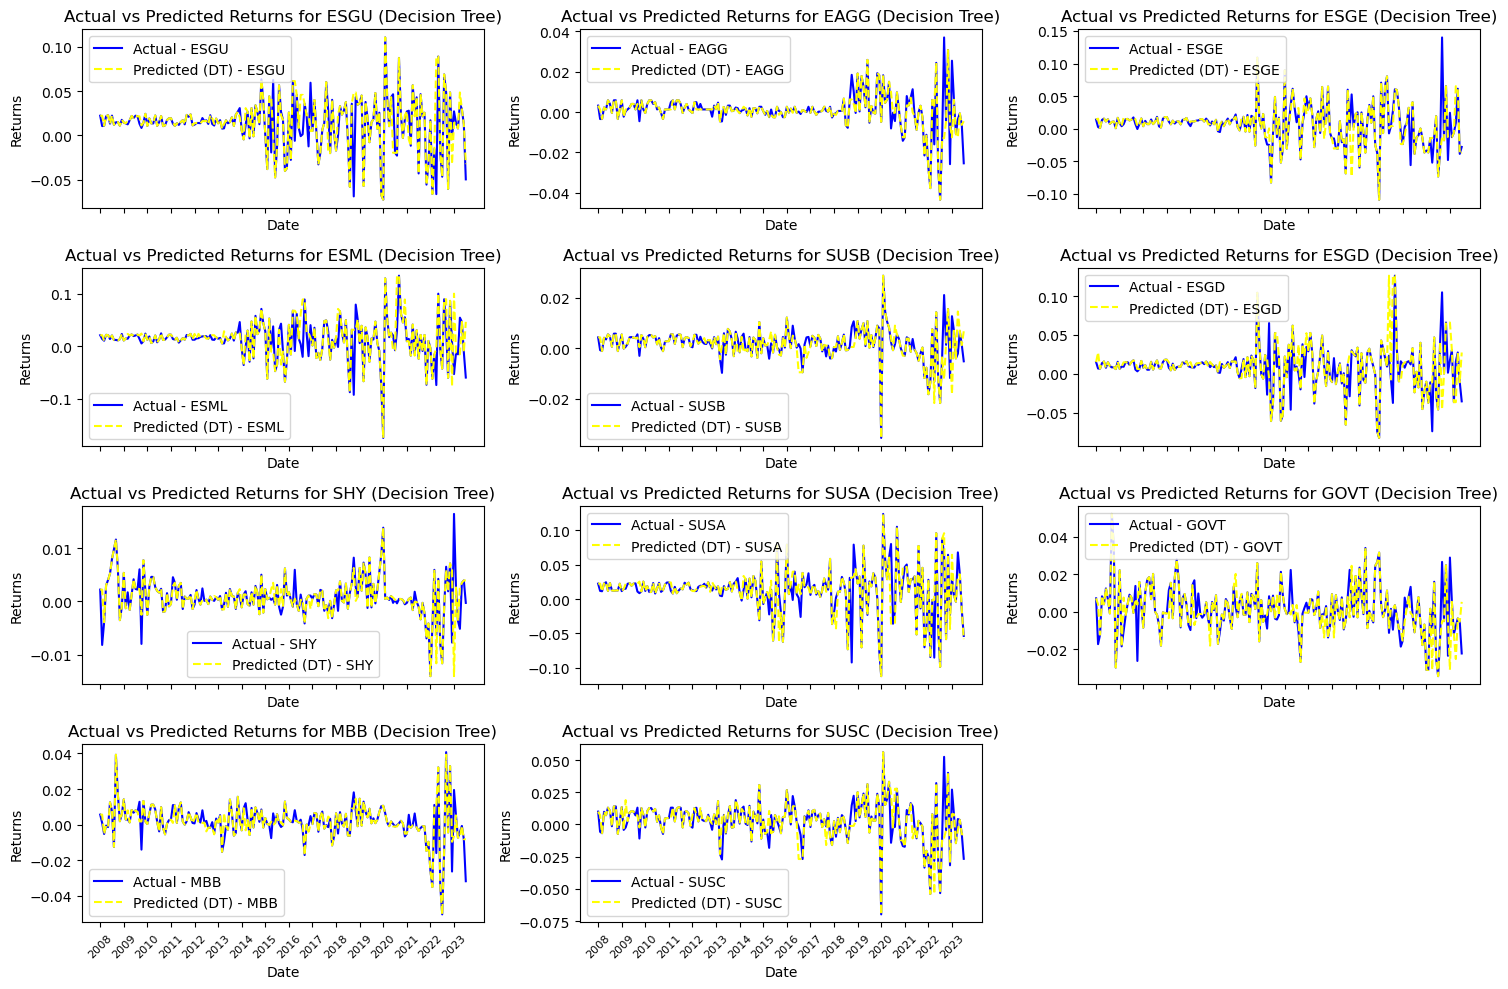

In [10]:
# Create a 4x3 grid for subplots for Decision Tree
fig_dt, axes_dt = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
axes_dt = axes_dt.flatten()
print('Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRegression Tree\033[0m')
print('', sep='/n')

for i, ticker in enumerate(ticker_list):
    # Initialize Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    
    # Lists to store evaluation metrics
    mae_list_dt = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list_dt = []
    predicted_returns_list_dt = []
    
    # K-fold cross-validation for Decision Tree
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = merged_df[ticker].iloc[train_index], merged_df[ticker].iloc[test_index]
        
        # Model Training for Decision Tree
        dt_model.fit(X_train, y_train)
        
        # Model Prediction for Decision Tree
        y_pred_dt = dt_model.predict(X_test)
        
        # Evaluate Model Performance
        mae_dt = mean_absolute_error(y_test, y_pred_dt)
        mae_list_dt.append(mae_dt)
        
        # Store actual and predicted returns for Decision Tree
        actual_returns_list_dt.extend(y_test)
        predicted_returns_list_dt.extend(y_pred_dt)
    
    # Calculate average MAE across folds for the current stock
    average_mae_dt = sum(mae_list_dt) / len(mae_list_dt)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae_dt}')
    
    # Predict returns for the entire period using Decision Tree
    predicted_returns_dt = dt_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame for Decision Tree
    predicted_returns_df_dt[ticker] = predicted_returns_dt
    
    # Plot the actual and predicted time series for Decision Tree
    ax = axes_dt[i]
    ax.plot(time_serie_plot, merged_df[ticker], label=f'Actual - {ticker}', color='blue')
    ax.plot(time_serie_plot, predicted_returns_dt, label=f'Predicted (DT) - {ticker}', linestyle='--', color='yellow')
    ax.set_title(f'Actual vs Predicted Returns for {ticker} (Decision Tree)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.legend()

    # Adjust x-axis labels
    ax.set_xticks(time_serie_plot[::12])  # Set x-axis ticks every 12 months
    ax.set_xticklabels(years[::12], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes_dt)):
    axes_dt[j].axis('off')

# Adjust layout for Decision Tree
plt.tight_layout()
plt.show()

## Monthly returns predictions 

The following Dataframes containt the monthly return predictions made by the respective machine learning method based on the previous month feature values. 

In [11]:
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2008-03,0.008464,0.004043,-0.001023,-0.017954,-0.006045,0.002478,0.003674,0.002243,0.008519,0.002896,-0.009599
2008-04,0.007928,0.003291,-0.002324,-0.023402,-0.007072,0.001588,0.002866,0.000543,0.004504,0.000328,-0.012518
2008-05,0.013543,-0.000720,-0.000996,0.001292,-0.002139,0.005324,-0.000870,0.012662,-0.003174,-0.002596,-0.005939
2008-06,0.017485,0.001176,0.010254,0.017847,0.002814,0.011910,0.002523,0.019713,0.004928,0.000652,0.005898
2008-07,0.020212,0.001496,0.013322,0.018609,0.003215,0.014605,0.003520,0.018649,0.003374,0.000687,0.006849
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.012258,-0.007116,-0.001016,-0.000593,-0.000482,-0.015737,-0.001834,0.001362,-0.005379,-0.004089,-0.007637
2023-06,0.019296,0.001662,0.023285,0.012642,0.004654,0.008104,0.001875,0.009096,-0.000878,-0.000237,-0.001560
2023-07,0.018688,-0.003253,0.024605,0.022962,0.003203,0.009640,0.002350,0.010464,-0.003216,-0.003038,-0.003275
2023-08,-0.000421,-0.006758,-0.023641,-0.012737,-0.000128,-0.008380,0.002225,-0.023534,-0.004414,-0.005953,-0.008404


In [12]:
# Random forest predicted Monthly returns for each Index (ETF): 
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2008-03,0.008464,0.004043,-0.001023,-0.017954,-0.006045,0.002478,0.003674,0.002243,0.008519,0.002896,-0.009599
2008-04,0.007928,0.003291,-0.002324,-0.023402,-0.007072,0.001588,0.002866,0.000543,0.004504,0.000328,-0.012518
2008-05,0.013543,-0.000720,-0.000996,0.001292,-0.002139,0.005324,-0.000870,0.012662,-0.003174,-0.002596,-0.005939
2008-06,0.017485,0.001176,0.010254,0.017847,0.002814,0.011910,0.002523,0.019713,0.004928,0.000652,0.005898
2008-07,0.020212,0.001496,0.013322,0.018609,0.003215,0.014605,0.003520,0.018649,0.003374,0.000687,0.006849
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.012258,-0.007116,-0.001016,-0.000593,-0.000482,-0.015737,-0.001834,0.001362,-0.005379,-0.004089,-0.007637
2023-06,0.019296,0.001662,0.023285,0.012642,0.004654,0.008104,0.001875,0.009096,-0.000878,-0.000237,-0.001560
2023-07,0.018688,-0.003253,0.024605,0.022962,0.003203,0.009640,0.002350,0.010464,-0.003216,-0.003038,-0.003275
2023-08,-0.000421,-0.006758,-0.023641,-0.012737,-0.000128,-0.008380,0.002225,-0.023534,-0.004414,-0.005953,-0.008404


## Historical Monthly returns 

In [13]:
# Filled Index monthly returns used as proxy of the ETF 
df_imputed_index

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
Date,,,,,,,,,,,
2005-01,0.021422,0.002458,0.015992,0.023920,0.003926,0.014460,-0.000517,0.024561,0.004395,0.005322,0.007864
2005-02,0.012504,0.001437,0.002427,0.011076,-0.000587,0.009028,-0.002329,0.012679,-0.005480,-0.004635,-0.003850
2005-03,0.015782,0.000958,0.009445,0.019740,0.000862,0.013335,0.000197,0.017774,-0.002541,-0.001856,-0.000061
2005-04,0.011731,0.003937,0.009454,0.010626,0.005031,0.006453,0.005707,0.011238,0.013407,0.011069,0.011223
2005-05,0.015948,0.003224,0.011671,0.018218,0.005910,0.009916,0.003740,0.017272,0.009123,0.007877,0.012778
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.007790,-0.010849,-0.006359,-0.015336,-0.004040,-0.036580,-0.003642,-0.003863,-0.011722,-0.007327,-0.014471
2023-06,0.035321,-0.003571,0.008918,0.054402,-0.002137,0.015630,-0.005155,0.067937,-0.007496,-0.004266,0.004196
2023-07,0.029793,-0.000672,0.061386,0.046461,0.006721,0.027444,0.003486,0.036107,-0.003442,-0.000746,0.003532


# Portfolio Optimization 

## Build the initial portfolio using riskfolio package and the  linear constraint based on the minimum ESG rating of the portfolio

## Min Variance ,Black Litterman and Efficient frontier optimization at each month

Create a ranking matrix of our prediction 

In [14]:
# Regression Tree predicted Monthly returns for each Index (ETF): 
predicted_returns_df

ranked_returns = predicted_returns_df.rank(axis=1, ascending=False, method='max')
ranked_returns

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2008-03,2.0,3.0,8.0,11.0,9.0,6.0,4.0,7.0,1.0,5.0,10.0
2008-04,1.0,3.0,8.0,11.0,9.0,5.0,4.0,6.0,2.0,7.0,10.0
2008-05,1.0,5.0,7.0,4.0,8.0,3.0,6.0,2.0,10.0,9.0,11.0
2008-06,3.0,10.0,5.0,2.0,8.0,4.0,9.0,1.0,7.0,11.0,6.0
2008-07,1.0,10.0,5.0,3.0,9.0,4.0,7.0,2.0,8.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,1.0,9.0,5.0,4.0,3.0,11.0,6.0,2.0,8.0,7.0,10.0
2023-06,2.0,8.0,1.0,3.0,6.0,5.0,7.0,4.0,10.0,9.0,11.0
2023-07,3.0,10.0,1.0,2.0,6.0,5.0,7.0,4.0,9.0,8.0,11.0
2023-08,3.0,6.0,11.0,9.0,2.0,7.0,1.0,10.0,4.0,5.0,8.0


In [15]:
efficient_frontier_dict

{Timestamp('2010-03-01 00:00:00'): {'Date': Timestamp('2010-03-01 00:00:00'),
  'Points': [{'Point': 1,
    'ESG Score': 7.000000004163844,
    'Weights': {'ESGU': 0.13700903997628638,
     'EAGG': 0.137009088287697,
     'ESGE': 0.05376049307707028,
     'ESML': 0.13700908055697578,
     'SUSB': 0.13700908275298493,
     'ESGD': 0.13700807922313332,
     'SHY': 0.053036971743579034,
     'SUSA': 0.04480910164975114,
     'GOVT': 0.04480909438961492,
     'MBB': 0.07373086466926816,
     'SUSC': 0.04480910367363926}},
   {'Point': 2,
    'ESG Score': 7.000000542418292,
    'Weights': {'ESGU': 0.09255154152714043,
     'EAGG': 0.08140621457578791,
     'ESGE': 0.11619102274309455,
     'ESML': 0.13700900020061632,
     'SUSB': 0.12597131195806502,
     'ESGD': 0.04481506554514746,
     'SHY': 0.044809222007567574,
     'SUSA': 0.13700809199792074,
     'GOVT': 0.04480916913143192,
     'MBB': 0.13061925673442148,
     'SUSC': 0.044810103578806514}},
   {'Point': 3,
    'ESG Score': 7.02

## Calculate the cumulative return and the fees of our portfolio according to the risk rolerance

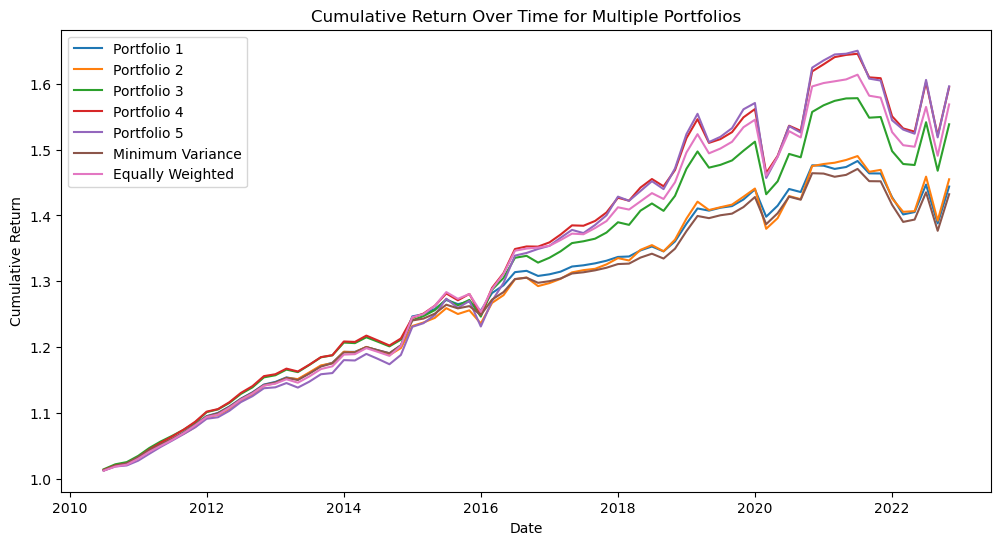

In [16]:
# Convert the 'Date' column to a datetime type for all portfolios
for portfolio_returns, label in zip(
        [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, portfolio_returns_mv,portfolio_returns_eq_w],
        ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5', 'Minimum Variance', 'Equally Weighted']):
    portfolio_returns['Date'] = pd.to_datetime(portfolio_returns['Date'])
    portfolio_returns['Cumulative_Return'] = (1 + portfolio_returns['Portfolio_Return']).cumprod()

# Plotting
plt.figure(figsize=(12, 6))

# Plot cumulative returns for all portfolios
for i, (portfolio_returns, label) in enumerate(zip(
        [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, portfolio_returns_mv,portfolio_returns_eq_w],
        ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5', 'Minimum Variance', 'Equally Weighted'])):
    plt.plot(portfolio_returns['Date'], portfolio_returns['Cumulative_Return'], label=label)

plt.title('Cumulative Return Over Time for Multiple Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


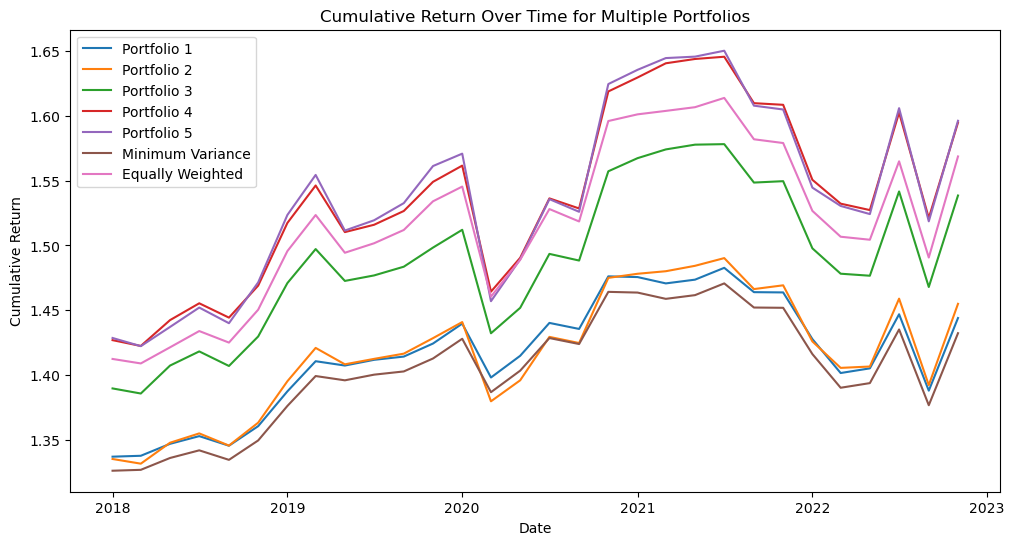

In [24]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot cumulative returns for all portfolios
for i, (portfolio_returns, label) in enumerate(zip(
        [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, portfolio_returns_mv,portfolio_returns_eq_w],
        ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5', 'Minimum Variance', 'Equally Weighted'])):
    plt.plot(portfolio_returns['Date'].iloc[-30:], portfolio_returns['Cumulative_Return'].iloc[-30:], label=label)

plt.title('Cumulative Return Over Time for Multiple Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


## ESG Score across time 

Mean ESG score on Backtest period:

Portfolio 1: 7.127150318792651
Portfolio 2: 7.167172390428826
Portfolio 3: 7.146587546797976
Portfolio 4: 7.121788198960678
Portfolio 5: 7.098321575818888


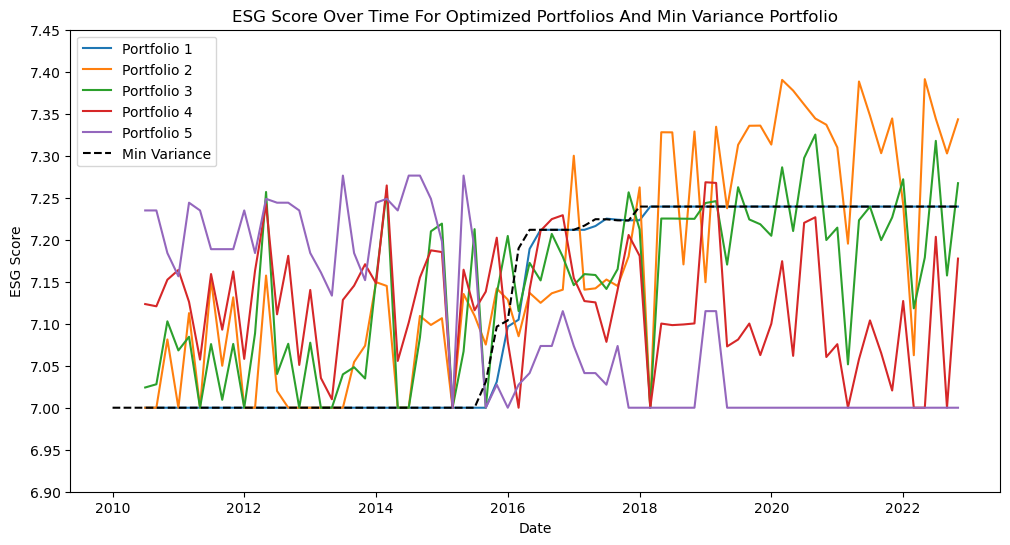

In [18]:
# Assuming portfolio_returns_1, ..., portfolio_returns_5, monthly_min_variance contain 'Date' and 'ESG Score'
# Convert the 'Date' column to a datetime type
for portfolio_returns in [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, monthly_min_variance]:
    portfolio_returns['Date'] = pd.to_datetime(portfolio_returns['Date'])

# Plotting
plt.figure(figsize=(12, 6))


print(f'\033[1mMean ESG score on Backtest period:\033[0m')
print('', sep='\n')

# Plot ESG scores for portfolios 1 to 5
for i, portfolio_returns in enumerate([portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5]):
    plt.plot(portfolio_returns['Date'], portfolio_returns['ESG Score'], label=f'Portfolio {i + 1}')
    print(f'Portfolio {i+1}: {np.mean(portfolio_returns["ESG Score"])}')

# Plot ESG scores for monthly_min_variance
plt.plot(monthly_min_variance['Date'], monthly_min_variance['ESG Score'], label='Min Variance', linestyle='--', color='black')

plt.yticks(np.arange(6.9, 7.5, 0.05))

# Add a horizontal line at y=7
#plt.axhline(y=7, color='red', linestyle='--', alpha=0.5)

plt.title('ESG Score Over Time For Optimized Portfolios And Min Variance Portfolio')
plt.xlabel('Date')
plt.ylabel('ESG Score')
plt.legend()
plt.show()


# Mean of expense ratio of our portfolio across time

In [19]:
print(np.mean(ETF_fees))
print(portfolio_returns_1['Fees'].mean())
print(portfolio_returns_2['Fees'].mean())
print(portfolio_returns_3['Fees'].mean())
print(portfolio_returns_4['Fees'].mean())
print(portfolio_returns_5['Fees'].mean())

0.0015090909090909091
0.0013482284485036354
0.0014095188936091132
0.0014678868666509672
0.0015183091088264557
0.0015633256702669827


In [20]:
# List of portfolio DataFrames
portfolios = [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, portfolio_returns_mv, portfolio_returns_eq_w]

# Assuming the risk-free rate is 0 (replace with the actual risk-free rate)
risk_free_rate = 0

# Calculate the Sharpe ratio for each portfolio
for i, portfolio in enumerate(portfolios):
    # Calculate portfolio volatility (standard deviation of returns)
    portfolio_volatility = portfolio['Portfolio_Return'].std()

    # Calculate Sharpe ratio for each period
    portfolio['Sharpe_Ratio'] = (portfolio['Portfolio_Return'] - risk_free_rate) / portfolio_volatility

    # Calculate the average Sharpe ratio for the entire period
    average_sharpe_ratio = portfolio['Sharpe_Ratio'].mean()

    # Display the average Sharpe ratio for each portfolio
    print(f'Portfolio {i + 1} - Average Sharpe Ratio: {average_sharpe_ratio}')


Portfolio 1 - Average Sharpe Ratio: 0.4068304389459732
Portfolio 2 - Average Sharpe Ratio: 0.36081480082868006
Portfolio 3 - Average Sharpe Ratio: 0.36104879639866577
Portfolio 4 - Average Sharpe Ratio: 0.3506012822743465
Portfolio 5 - Average Sharpe Ratio: 0.3178917967753547
Portfolio 6 - Average Sharpe Ratio: 0.40512748366762086
Portfolio 7 - Average Sharpe Ratio: 0.36343329806825514


### Turnover and Execution cost estimation

In [21]:

# Assuming df_yearly_turnover and df_exec_cost are your DataFrames
compute_avg_turnover_and_exec_cost(df_yearly_turnover, df_yearly_exec_cost, pf_index)


Portfolio 1
Average yearly turnover: 8.110760884029652 %
Average execution cost estimation: 0.17602835337864559 $

Portfolio 2
Average yearly turnover: 26.05643081803076 %
Average execution cost estimation: 1.7475883071347575 $

Portfolio 3
Average yearly turnover: 30.165219341730836 %
Average execution cost estimation: 2.012487360280561 $

Portfolio 4
Average yearly turnover: 24.386402911699662 %
Average execution cost estimation: 1.8246974462278875 $

Portfolio 5
Average yearly turnover: 19.555674985224552 %
Average execution cost estimation: 1.215260143599126 $



## Retrieve the matrix of changes in the weights

##Example of frontier that we calibrate at each month in order to retrieve the 5 portfolios

ValueError: shapes (108, 11) and (0, 11) not aligned

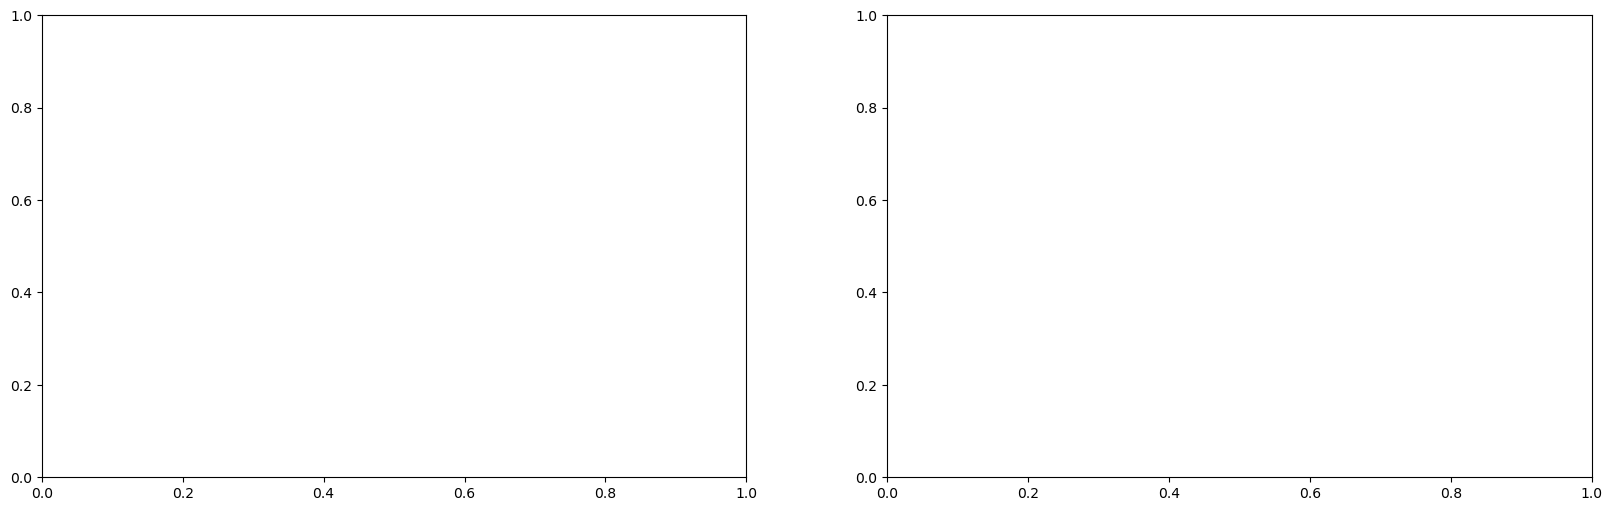

In [22]:

start_date = '2015-10'
end_date = '2022-12'

label = 'Max Risk Adjusted Return Portfolio'  # Title of point
# Convert start_date and end_date to Timestamps
start_date_timestamp = pd.Timestamp(start_date)
end_date_timestamp = pd.Timestamp(end_date)

# Assuming monthly_mu_cov_bl is a list of dictionaries
unique_dates = set()

# Iterate through monthly_mu_cov_bl to get unique dates
unique_mu_cov_bl = []
for entry in monthly_mu_cov_bl:
    date = entry['Date']
    
    # Check if the date is already in the set
    if date not in unique_dates:
        unique_dates.add(date)
        
        # Add the entry to the new list
        unique_mu_cov_bl.append(entry)

# Filter mu and cov from unique_mu_cov_bl based on the start and end dates
filtered_mu_cov = [entry for entry in unique_mu_cov_bl if start_date_timestamp <= entry['Date'] <= end_date_timestamp]

# Iterate through each mu_cov entry and plot the efficient frontier
for mu_cov_entry in filtered_mu_cov:
    date = mu_cov_entry['Date']
    mu = pd.DataFrame(mu_cov_entry['mu_bl'], index=['weights'])
    cov = pd.DataFrame(mu_cov_entry['cov_bl'])
    w_bl = monthly_bl_variance[monthly_bl_variance['Date'] == date].iloc[:, 2:]
    returns = df_imputed_index[
        (df_imputed_index.index.to_timestamp() < date) & (df_imputed_index.index.to_timestamp() >= date - pd.DateOffset(months=108))] - 0.05/12

    # Find the entry in efficient_frontier_dict for the current date
    date_entry = efficient_frontier_dict[date]

    # Extract the points and create a DataFrame
    points = date_entry['Points']
    points_data = []
    for point in points:
        weights = list(point['Weights'].values())
        points_data.append(weights)

    columns = list(point['Weights'].keys())
    points_df = pd.DataFrame(points_data, columns=columns)

    # Create two separate subplots for each iteration
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    rp.plot_frontier(w_frontier=points_df.T, mu=mu, cov=cov, returns=returns, rm='MV',
                     rf=0.05, alpha=0.1, cmap='viridis', w=w_bl, label=label,
                     marker='*', s=16, c='r', height=6, width=10, ax=ax1, t_factor = 12)
    rp.plot_frontier_area(w_frontier=points_df.T, cmap="tab20", height=6, width=10, ax=ax2)
    
    ax1.set_title(f'Efficient Frontier for {date}')
    ax2.set_title(f'Frontier Area for {date}')
    
    plt.show()


In [ ]:
print("Shape of returns matrix:", returns.shape)
print("Shape of w_bl matrix:", w_bl.shape)

## Bonus content

In [ ]:
ax = rp.plot_hist(returns=returns,
                  w=pd.DataFrame(points_df.loc[4]),
                  alpha=0.05,
                  bins=50,
                  height=6,
                  width=10,
                  ax=None)